## Routine processing result 1 - average velocity ##
+ Figure 6 - Average Velocity Map for the whole Galapagos Islands from Sentinel-1 data

In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
from mintpy.defaults.plot import *
from mintpy.objects import sensor
from mintpy.utils import readfile, plot as pp, utils as ut
from mintpy import view

work_dir = os.path.expanduser('~/insarlab/Galapagos/GalapagosSenDT128/mintpy/geo')
os.chdir(work_dir)
print('Go to directory: '+work_dir)

## Prepare Data File
#!generate_mask.py dem.h5 -m 0.5 -o demWaterMask.h5
#!mask.py ../../DEM/demLat_S02_N01_Lon_W092_W090.dem.wgs84 -m demWaterMask.h5 -o dem_msk.h5
#!subset.py geo_velocity_masked.h5 -r dem.h5 -o velocity_masked.h5 --outfill NaN

proj_name = sensor.project_name2sensor_name(work_dir)[1]
out_file = os.path.join(os.getcwd(), 'velocity_{}.png'.format(proj_name))

Go to directory: /Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/mintpy/geo


view.py velocity_masked.h5 velocity --mask no --sub-lat -1.2 0.2 --sub-lon -91.7 -90.75 -c jet --wrap --wrap-range -3 7 --nocbar --dem dem_msk.h5 --dem-nocontour --ref-size 4 --lalo-label --scalebar 0.2 0.8 0.03 --scalebar-pad 0.03 --notitle --fontsize 12 
view.py velocity_masked.h5 velocity --mask no --sub-lat -1.2 0.2 --sub-lon -91.7 -90.75 -c jet --wrap --wrap-range -3 7 --nocbar --dem dem_msk.h5 --dem-nocontour --ref-size 4 --lalo-label --scalebar 0.2 0.8 0.03 --scalebar-pad 0.03 --notitle --fontsize 12 
run view.py in MintPy release version v1.2beta-48, release date 2019-10-02
input file is velocity file: /Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/mintpy/geo/velocity_masked.h5 in float32 format
file size in y/x: (4161, 2862)
turning glob search OFF for velocity file
num of datasets in file velocity_masked.h5: 2
datasets to exclude (0):
[]
datasets to display (1):
['velocity']
data   coverage in y/x: (0, 0, 2862, 4161)
subset coverage in y/x: (429, 1109, 1789, 3051)
data  

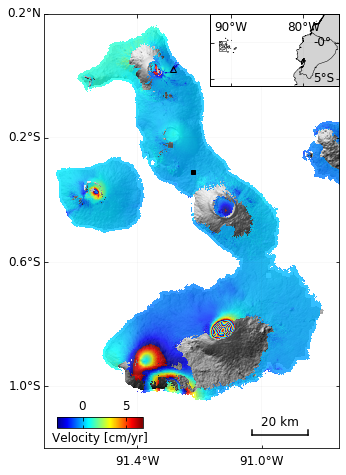

In [6]:
## plot velocity with functions from pysar/view.py
geo_box = (-91.7, 0.2, -90.75, -1.2)    # WNES
W, N, E, S = geo_box

cmd =  'view.py velocity_masked.h5 velocity --mask no '
cmd += '--sub-lat {} {} --sub-lon {} {} '.format(S, N, W, E)
cmd += '-c jet --wrap --wrap-range -3 7 --nocbar '
cmd += '--dem dem_msk.h5 --dem-nocontour --ref-size 4 '
cmd += '--lalo-label --scalebar 0.2 0.8 0.03 --scalebar-pad 0.03 --notitle --fontsize 12 '
print(cmd)

fig, ax = plt.subplots(figsize=[6, 8])
data, atr ,inps = view.prep_slice(cmd)
ax, inps, im = view.plot_slice(ax, data, atr, inps)[0:3]

# colorbar
cax = fig.add_axes([0.2, 0.16, 0.2, 0.02])
cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
cbar.ax.xaxis.tick_top()
cbar.ax.tick_params(which='both', direction='in', labelsize=font_size, bottom=True, top=True)
cbar.set_label('Velocity [cm/yr]', fontsize=font_size)
## plot POI
wolf_lalo = (0.0232, -91.2838)
ax.plot(wolf_lalo[1], wolf_lalo[0],'^', ms=6, mec='k', mfc='none', mew=1.)


# insert location map
ax2 = fig.add_axes([0.554, 0.717, 0.3, 0.2])
geo_box_loc = (-93, 4, -75, -6)  # WNES
m = pp.BasemapExt(llcrnrlon=geo_box_loc[0], llcrnrlat=geo_box_loc[3],
                  urcrnrlon=geo_box_loc[2], urcrnrlat=geo_box_loc[1],
                  projection='cyl', resolution='h', suppress_ticks=False, ax=ax2)
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='lightgray', lake_color='white')
m.drawcountries()
m.drawcoastlines(linewidth=0.5)
m.draw_lalo_label(geo_box_loc, ax=ax2, lalo_step=[5, 10], lalo_loc=[0, 1, 1, 0], xoffset=-3.6, yoffset=-2.8, font_size=font_size)
# plot AOI box
ax2.plot([W, E, E, W, W], [N, N, S, S, N], linewidth=0.5, color='k')

## save to jpg file
print('save figure to file', out_file)
#fig.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()